# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
import dataframe_image as dfi

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [3]:
# returns 10 random rows
df.sample(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
865,1476588,128711,RedFarm Hudson,Chinese,9.51,Weekend,3,29,26
1411,1477317,61889,Parm,Italian,15.77,Weekend,4,27,18
1710,1477030,240982,Rubirosa,Italian,24.30,Weekday,3,29,31
1820,1477910,39702,Frank Restaurant,Italian,12.08,Weekday,4,20,31
161,1477752,298824,Shake Shack,American,16.25,Weekday,3,30,24
1311,1478149,303548,Shake Shack,American,25.22,Weekend,3,27,25
846,1477755,107909,Cafeteria,American,12.08,Weekend,3,35,28
823,1476675,235818,Shake Shack,American,15.96,Weekday,4,28,27
1433,1476633,137565,Shake Shack,American,15.76,Weekend,5,20,25
1751,1477863,128216,Shake Shack,American,8.20,Weekday,4,33,26


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [4]:
# returns the rows and columns of the dataset
df.shape

(1898, 9)

#### Observations:
    The data has 1898 rows ranging from index 0-1897. It has 9 columns.

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [5]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
    All the numerical values are integers except for cost_of_the_order which is a float. rating which is a number up to 5 is a string and not a int or float. Thus, to do mathematical calculations on the rating column i will need to exclude data that says "Not Given" and then convert it to either an int or float data type. no null values in any of the columns. meaning i will not need to delete out rows that have invalid data.

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [6]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df["restaurant_name"]=df["restaurant_name"].astype("category")   # saves column restaurant_type as data type category
df["cuisine_type"]=df["cuisine_type"].astype("category")         # saves column cuisine_type as data type category
df["day_of_the_week"]=df["day_of_the_week"].astype("category")   # saves column day_of_the_week as data type category
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
    Change 3 rows into new data type "category" for reducing data space needed for calculations later on.

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [7]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
    order_id and customer_id have no importance in the summary of the data, since they are simply id numbers to track who ordered what. However, for the other 2 columns (food_preperation and delivery_time) there is not much skewness in the distibution of the data. As well as them being very close to one another. Meaning they could have a high correlation. The cost_of_the_order has positive skewness. The higher std means that the cost_of_the_order can vary widly depending on what is ordered, this is an accurate conclusion as orders that are placed are unique to each person and do not have a lower or higher limit.

### **Question 5:** How many orders are not rated? (0.5 mark)

In [8]:
df["rating"].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
    There are 736 orders that are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

In [9]:

# plt.figure(figsize=(15,5))
# plt.title('Most Popular Cuisine on Weekends')
# plt.xlabel('Cuisine Type')
# plt.ylabel('Count')

# ax = (df[["cuisine_type", "day_of_the_week"]].value_counts()).sort_index().plot(kind="bar", rot=90)
# # ax.set_yticks(np.arange(0, 110, 10))

# # ax2 = ax.twinx()
# # ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

# for p in ax.patches:
#     ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))


In [10]:
# This function returns the boxplots and histograms for a particular attribute.

def hist_box_combined(data, attribute, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    attribute: dataframe attribute/column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve or not (default True)
    bins: number of bins for histogram (default None)
    """
    f, (box, hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data=data, x=attribute, ax=box, showmeans=True, color="coral")
    
    # For histogram
    sns.histplot(data=data, x=attribute, kde=kde, ax=hist, color="slateblue")
    
    # Add mean to the histogram
    hist.axvline(data[attribute].mean(), color="darkgreen", linestyle="--")
    
    # Add median to the histogram
    hist.axvline(data[attribute].median(), color="black", linestyle="-")

# Order ID

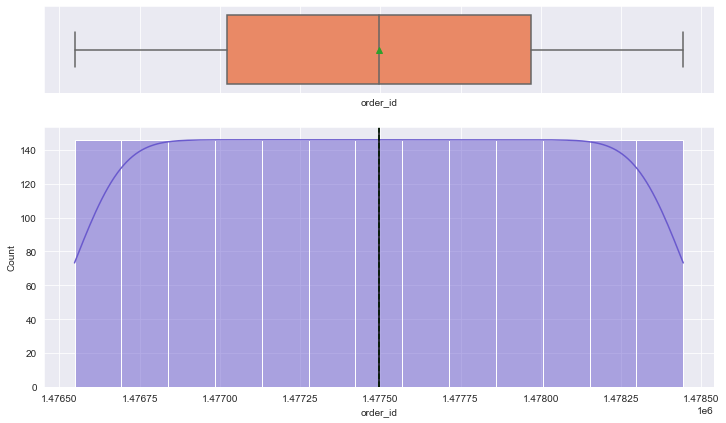

In [11]:
# histogram and boxplot of the order_id column
hist_box_combined(df, "order_id")
plt.savefig("hist_box_order_id.jpg", bbox_inches='tight')

# Customer ID

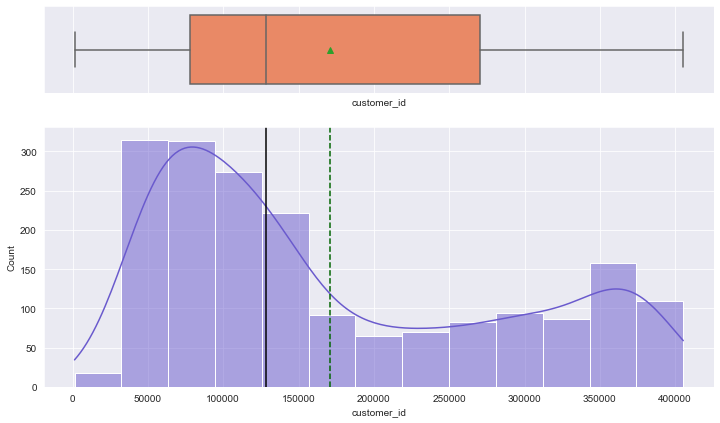

In [12]:
# histogram and boxplot of the customer_id column
hist_box_combined(df, "customer_id")
plt.savefig("hist_box_customer_id.jpg", bbox_inches='tight')

# Cost of the Order

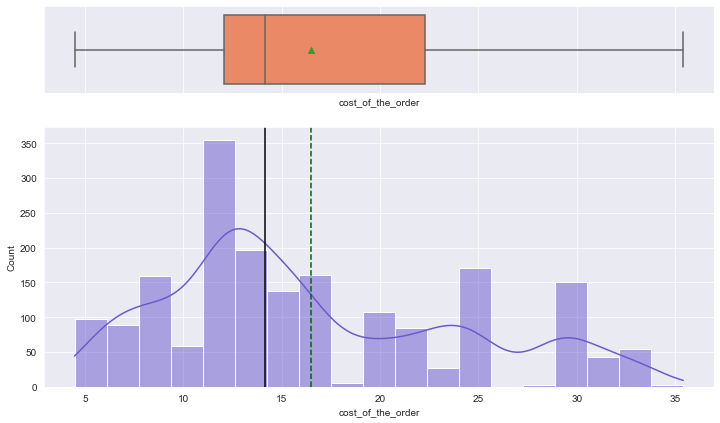

In [13]:
# histogram and boxplot of the cost_of_the_order column
hist_box_combined(df, "cost_of_the_order")
plt.savefig("hist_box_cost_of_the_order.jpg", bbox_inches='tight')

# Food Preparation Time

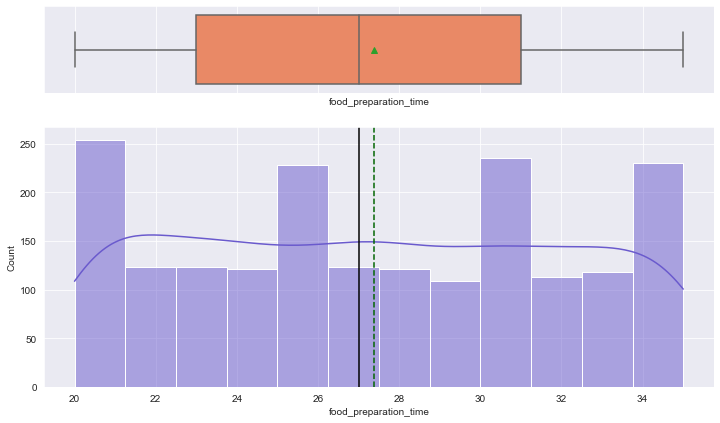

In [14]:
# histogram and boxplot of the food_preparation_time column
hist_box_combined(df, "food_preparation_time")
plt.savefig("hist_box_food_preparation_time.jpg", bbox_inches='tight')

# Delivery Time

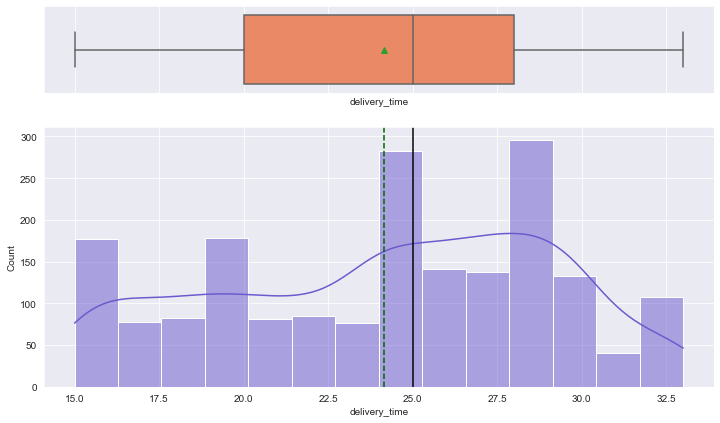

In [15]:
# histogram and boxplot of the delivery_time column
hist_box_combined(df, "delivery_time")
plt.savefig("hist_box_delivery_time.jpg", bbox_inches='tight')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


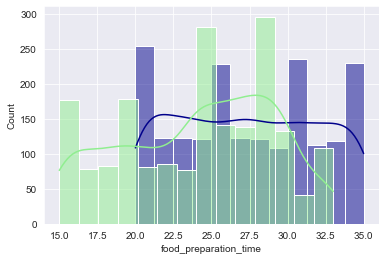

In [17]:
# placing food_preparation adn delivery_time on the same plot is more feasible
# as the are both temporal data in about the same time frames.
sns.histplot(df["food_preparation_time"], kde=True, color="darkblue")
sns.histplot(df["delivery_time"], kde=True, color="lightgreen")
plt.show()

#### Observations:
    There are no outliers in any column of the dataset
    
    order_id) The order_id has no real data distibution. The order_id data has no probablity of any particular number coming. customer_id does have a form of data evem though it is an id just as order_id is.
    
    customer_id) The customer_id shows that the smaller the number the greater the probablity of an order being placed by that customer. Thus, older customers are more likely to place an order than new customers. Meaning that the company is better at keeping older customers, but not as good at retaining current customers.
    
    cost_of_the_order) Similarly the cost_of_the_order has a greater probablity to occur from 10-15. Assuming that the food is close to the average amount price for a meal at $13, people are simply buying one meal and are not as likely to buy multiple meals or smaller meals such as appetizers.
    
    food_preparation) food_preparation has only four times that occur more often than the rest. These times occur at about 20,25,30, and 35 minute marks.
    
    delivery_time) The delivery_time is greatest at about 25-30.

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [18]:
# This will provide the top 5 restuarants sorted by number of orders.
df["restaurant_name"].value_counts(ascending=False).head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
    Shake shack receives by far the most orders. Tier 2 would consist of The meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken. Parm would be placed in Tier 3.

In [19]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

C:\Users\theijligers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


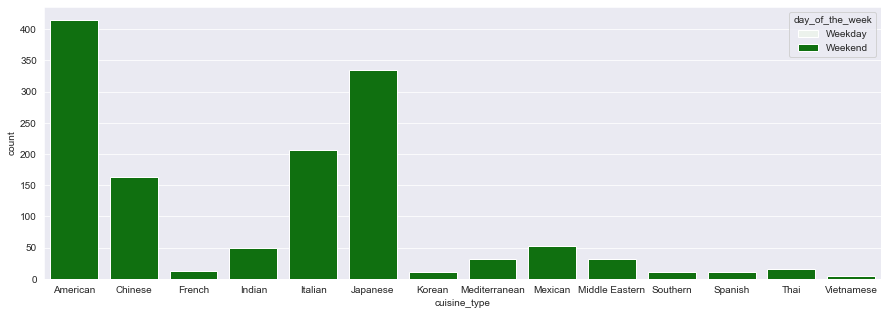

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

In [20]:
# Shows the countplot of the number of orders for each cuisine during the Weekend
plt.figure(figsize=(15,5))
sns.countplot("cuisine_type", hue="day_of_the_week", data=df, dodge=False, color="green")
plt.savefig("cuisine_type_value_count.jpg", bbox_inches='tight')
plt.show()

# shows list of the number of orders for each cuisine type on the Weekend
df.groupby("day_of_the_week").cuisine_type.value_counts()["Weekend"] 

#### Observations:
    American is the tier 1 cuisine type for the weekends. Tier 2 is Japanese. Tier 3 is Italian and Chinese. Tier 4 is the rest of the cuisine types.

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [21]:
# returns percentage of orders that cost over $20
(df[df["cost_of_the_order"]>20].cost_of_the_order.count())/(df["cost_of_the_order"].count())*100

29.24130663856691

#### Observations:
    Majority of the the data occured before the total of the order hit $20, thus supporting our conclusion that most orders come in as single meal orders.

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [22]:
# mean time to make a delivery
df.delivery_time.mean()

24.161749209694417

#### Observations:
    Mean time is about 24 minutes.

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [57]:
df[df["cost_of_the_order"]==df["cost_of_the_order"].max()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


In [53]:
# gives the data of the most expensive order in the data set
df.iloc[df["cost_of_the_order"].sort_values(ascending=False).head(1).index.values]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


#### Observations:
    It is good to note that the restaurant is Pylos. Maybe it has the most expensive dishes. The order was made during the weekday. The food prep time is below the mean, but the delivery time is above the mean. It is an older customer, so it is ok to assume that he has made more orders than just this one.

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

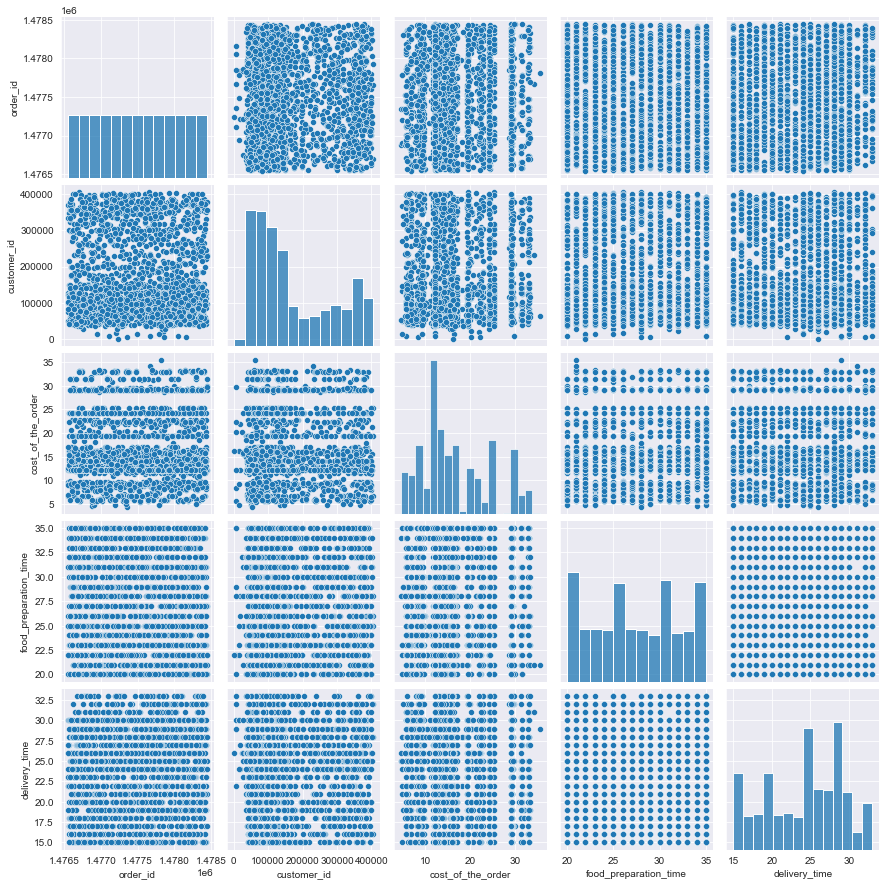

In [24]:
# returns pairplot for the dataset
sns.pairplot(data=df)

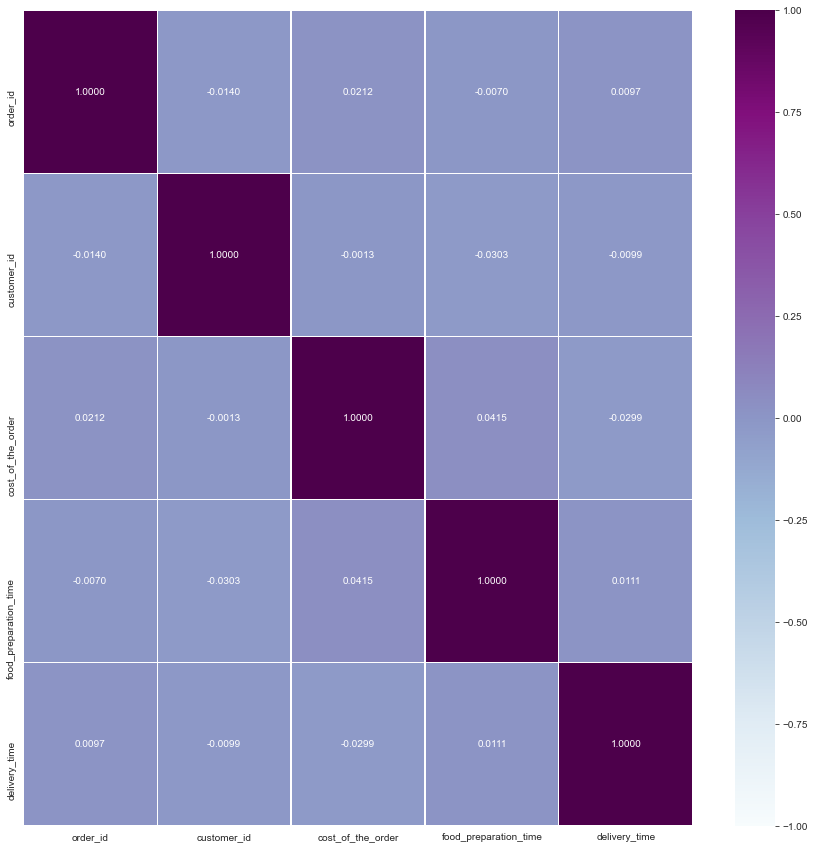

In [25]:
# returns a correlation heatmap plot
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True,vmin=-1, vmax=1, linewidths=0.1, fmt= '.4f',cmap="BuPu")
plt.savefig("correlation_no_rating.jpg", bbox_inches='tight')
plt.show()

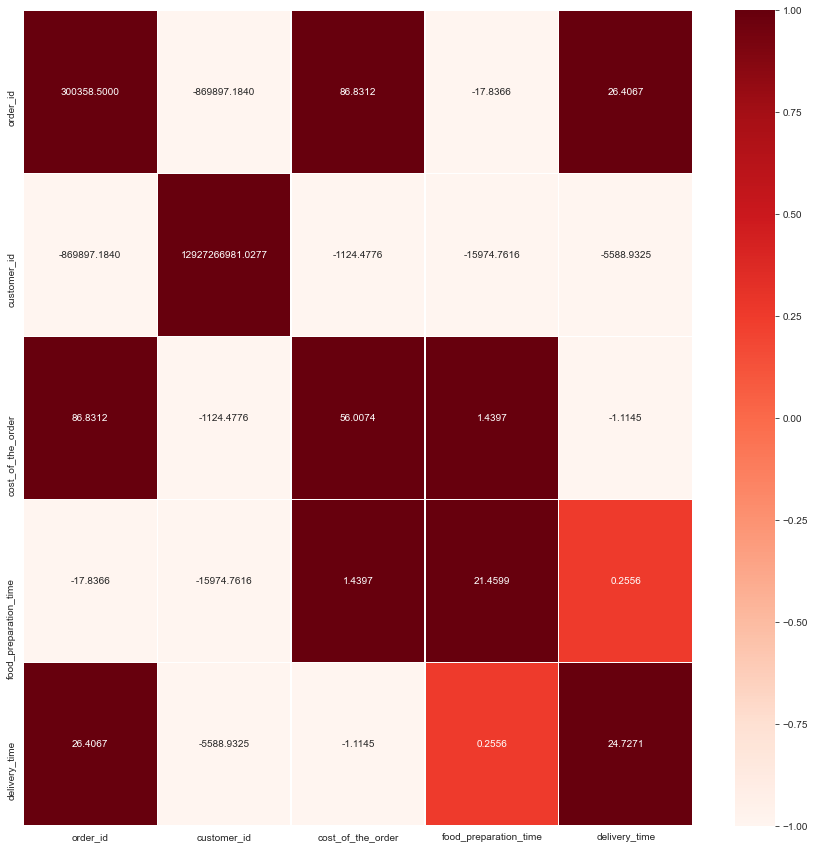

In [26]:
# returns a covariance heatmap plot
plt.figure(figsize=(15,15))
sns.heatmap(df.cov(), annot=True,vmin=-1, vmax=1, linewidths=0.1, fmt= '.4f',cmap="Reds")
plt.show()

In [27]:
df.mad()

order_id                   474.500000
customer_id              98791.093862
cost_of_the_order            6.193426
food_preparation_time        4.020606
delivery_time                4.202288
dtype: float64

In [28]:
# This will create a copy of df as df2 so that i do not mess up my original dataframe when trying to add the ratings column
# to the correlation diagram to try and find correlation.
df2=df.copy()

# This will set df2 as df2 excluding "Not given" in the rating column
df2=df2.loc[df2["rating"] != "Not given"].reset_index()

# will change the rating column from object type to int type, so that arithmatic will apply correctly.
df2["rating"]=df2["rating"].astype(int)

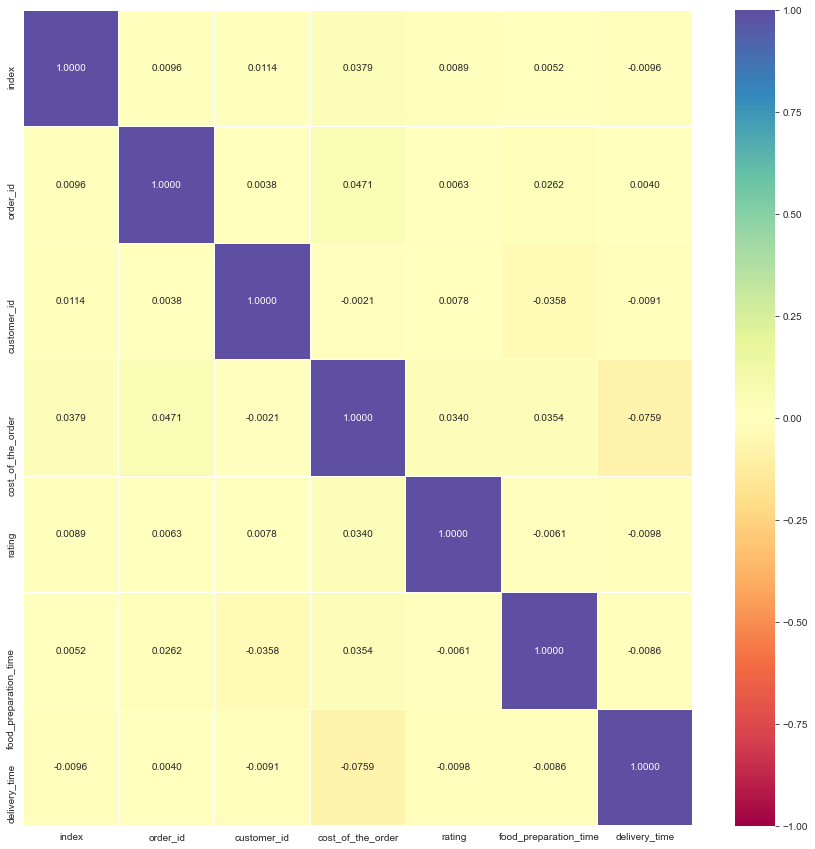

In [29]:
# returns a correlation plot that includes the rating column excluding the "Not given" entries
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(), annot=True,vmin=-1, vmax=1, linewidths=0.1, fmt= '.4f',cmap="Spectral")
plt.savefig("correlation_w_rating.jpg", bbox_inches='tight')
plt.show()

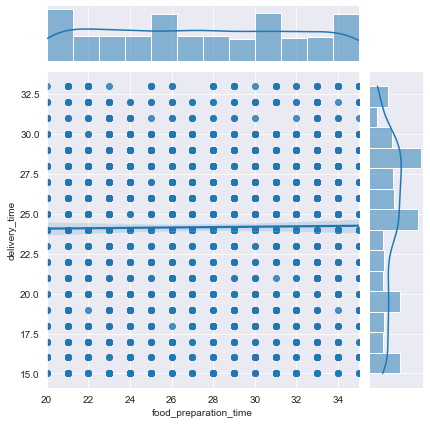

In [30]:
# jointplot for the food_preparation_time and delivery_time columns
sns.jointplot(data=df, x="food_preparation_time", y="delivery_time", kind="reg")
plt.show()

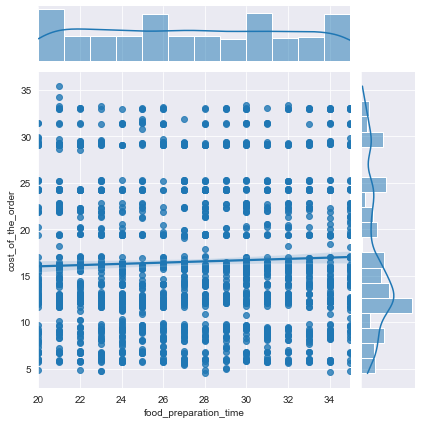

In [31]:
# jointplot for the food_preparation_time and cost_of_the_order columns
sns.jointplot(data=df, x="food_preparation_time", y="cost_of_the_order", kind="reg")
plt.show()

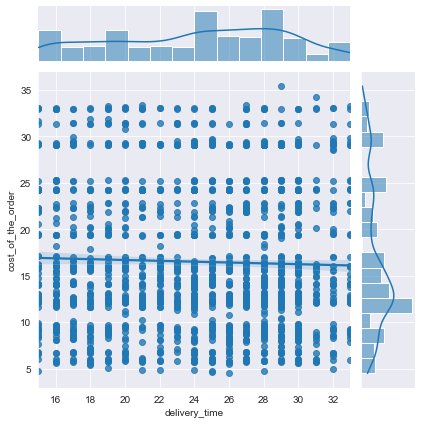

In [32]:
# jointplot for the cost_of_the_order and delivery_time columns
sns.jointplot(data=df, y="cost_of_the_order", x="delivery_time", kind="reg")
plt.show()

#### Observations:
    There is no correlation between any of the data. The closest thing to correlation is the cost_of_the_order and the preparation_time. There is no concrete correlation between them. You would think the higher the order the more food and the longer it would take ot prepare, but that is not the case. Additionaly, one would guess that the customer_id and the cost_of_the_order might correlate as well, as certain customers need more food or have more money to spend on food than others. Even when adding the rating column as integer there is still no correlation. 

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [33]:

# create a copy of df as df1 to not effect the original DataFrame
df1=df.copy()

# This will set df1 as df1 excluding "Not given" in the rating column
df1=df1.loc[df1["rating"] != "Not given"].reset_index()

# will change the rating column from object type to int type, so that arithmatic will apply correctly.
df1["rating"]=df1["rating"].astype(int)

# creating a new data set containing the sum of the rating column from df1
df1_sum_group_50=df1.groupby("restaurant_name").rating.sum().sort_values(ascending=False)

# creating a new data set containing the mean of the rating column from df1
df1_mean_group_4=df1.groupby("restaurant_name").rating.mean().sort_values(ascending=False)

# excludes all values from the sum data set that are not above 50
df1_sum_group_50=df1_sum_group_50[df1_sum_group_50>50]

# excludes all values from the mean data set that are not above 4
df1_mean_group_4=df1_mean_group_4[df1_mean_group_4>4]

# will merge the values only contained in both the mean data set above 4 and the sum data set above 50
# so that i know all of the restaurants that have a sum rating above 50 and a mean rating above 4.
restaurant_ratings=pd.merge(df1_sum_group_50,df1_mean_group_4, how="inner", on="restaurant_name", suffixes = ('_Sum', '_Mean'))
dfi.export(restaurant_ratings, "restaurant_ratings.jpg")
restaurant_ratings

,rating_Sum,rating_Mean
restaurant_name,,
Shake Shack,569,4.278195
The Meatball Shop,379,4.511905
Blue Ribbon Sushi,308,4.219178
Blue Ribbon Fried Chicken,277,4.328125
RedFarm Broadway,174,4.243902
Parm,161,4.128205
RedFarm Hudson,142,4.176471
TAO,122,4.357143
Han Dynasty,102,4.434783


#### Observations:
    There are 25 restaurants that fit the criteria. Shake Shack has the highest total of ratings added together in the criteria. Sushi of Gari Tribeca has the highest average rating in the criteria.

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

Revenue for orders over $20:  3688.7275
Revenue for orders over $5:  2477.5755000000004
Total revenue for orders both over $5 and $20:  6166.303


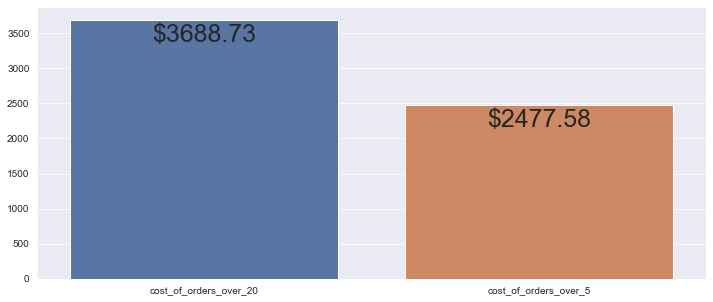

In [34]:
# create subset of the dataset where cost of the order is over $20
# and cost of the order is greater than $5 and less than or equal to $20.
df_orders_over_20=df[df.cost_of_the_order>20].reset_index()
df_orders_over_5=df[df.cost_of_the_order>5]
df_orders_over_5=df_orders_over_5[df_orders_over_5["cost_of_the_order"]<=20].reset_index()

# Taking the sum of the data in the subset of orders over $20 and muliplying it to the 25% and adding it to
# the sum of the data in the subset of the orders over$5 and muliplying it to the 15%
print("Revenue for orders over $20: ", df_orders_over_20.cost_of_the_order.sum()*.25)
print("Revenue for orders over $5: ", df_orders_over_5.cost_of_the_order.sum()*.15)
print("Total revenue for orders both over $5 and $20: ", (df_orders_over_20.cost_of_the_order.sum()*.25)+(df_orders_over_5.cost_of_the_order.sum()*.15))

# create a dataframe with the combined subsets above in order to graph on a barplot
df_merge_over=pd.DataFrame({"cost_of_orders_over_20": df_orders_over_20.cost_of_the_order.sum()*.25,"cost_of_orders_over_5": df_orders_over_5.cost_of_the_order.sum()*.15},
                          index=[0])

# barplot graph showing total amount at top of column
plt.figure(figsize=(12, 5))   #size of the graph

ax=sns.barplot(data=df_merge_over, palette="deep")   #creat barplot and color scheme

# creating labeling annotation as well as position for each bar
for p in ax.patches:
    label="${:.2f}".format(p.get_height())   # label format and value
    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot
    
#     label postion
    ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=25,
            xytext=(0, -15),
            textcoords="offset points",
        )
plt.savefig("Revenue_Breakdown.jpg", bbox_inches='tight')   # save graph as JPEG
plt.show()

#### Observations:
    Assuming this is a gig operation for the delivery driver, then the cost of the driver is paid for by the customer that purchase the order. Thus, there are no costs to the company outside of payroll to employees, utilities, rent, and taxes, which i do not have access to. Then, the net revenue is simply the percentage of the orders at differnt sums added together. For the shown dataset the net revenue for the company is $6,166.30. The company makes more money from orders over $20 than from orders over $5. Thus, the side affect of a higher percentage being charged does not limit the amount of orders enough to sway the current percentage rate.

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [35]:
# create a new data series combining the food preparation time and the delivery time
df_total_time=df["delivery_time"]+df["food_preparation_time"]

# sort the data series to only include total times over 60 minutes
df_total_time_over_60=df_total_time[df_total_time>60]

# divide the number of rows from df to the number of rows from the new data series containing total time to complete order
# multiply the divised value by 100 to achieve the percentage
(df_total_time_over_60.count()/df.delivery_time.count())*100

10.537407797681771

#### Observations:
    A very small amount of deliveries take over an hour to complete. 10.5% to be exact. This mean almost 90% of deliveries take under an hour to complete.

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

  day_of_the_week  delivery_time
0         Weekday      28.340037
1         Weekend      22.470022


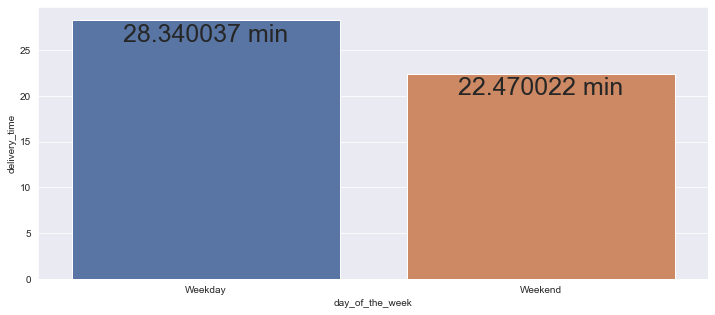

In [36]:
# group the data by day of the week and then take the mena of the delivery time. printing the head of the dataset
df_delivery_time_per_week_day=pd.DataFrame(df.groupby("day_of_the_week").delivery_time.mean().reset_index())
dfi.export(df_delivery_time_per_week_day, "delivery_time_breakdown_by_week_day.jpg")
print(df_delivery_time_per_week_day)

# barplot graph showing total amount at top of column
plt.figure(figsize=(12, 5))   #size of the graph

ax=sns.barplot(data=df_delivery_time_per_week_day, y="delivery_time", x="day_of_the_week", palette="deep")   #creat barplot and color scheme

# creating labeling annotation as well as position for each bar
for p in ax.patches:
    label="{:f} min".format(p.get_height())   # label format and value
    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot
    
#     label postion
    ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=25,
            xytext=(0, -15),
            textcoords="offset points",
        )
plt.savefig("Delivery_Time_Per_Week_Day.jpg", bbox_inches='tight')   # save graph as JPEG
plt.show()

#### Observations:
    The delivery time takes 6 minutes longer on the Weekday then on the Weekend. This could be due to the fact that traffic is higher during the week due to people commuting to and from work.

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (5 marks)

#### Insights:
    Large amount of the customer base is interested in American food. The next most popular type of foods are all popular in American culture.
    
    Most of the orders are under $20 (30% of orders are over $20), yet almost 60% of the revenue is made from orders over $20.
    
    The delivery time is 6 minutes faster on the Weekend then on Weekdays. So more deliveries can be made on the Weekend than on the Weekday. Meaning more orders can be made, which means more money can be made.
    
    Shake Shack is the most popular restaurant in the dataset, while Sushi of Gari Tribecca is the best rated restaurant.

#### Recommendation:
    1. The recommendation would be to try and target weekends and large purchases to increase revenue.
    2. Targeting more expensive restuarants shall maximize profits.
    3. Marketing house parties, or home family gatherings will help to gain the results needed to maximize profits.
    4. Creating a more efficient way of scheduling drivers to take shorter trips shall increase trips, in turn increasing revenue
    5. To increase customer satisfaction advertising the restaurants with the highest mean rating, such as Blue Ribbon Sushi Bar & Grill, Sushi of Gari Tribecca, Five Guys Burgers and Fries, and The Meatball Shop.